In [1]:
%matplotlib inline

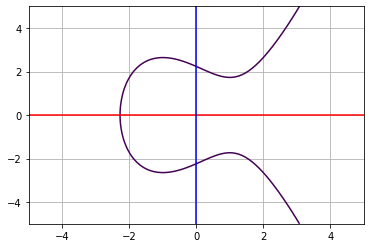

In [9]:
import numpy as np
import matplotlib.pyplot as plt

a = -3
b = 5

y, x = np.ogrid[-5:5:100j, -5:5:100j]
z = pow(y, 2) - pow(x, 3) - x * a - b

plt.contour(x.ravel(), y.ravel(), z, [0])
plt.axhline(y=0, color='r')
plt.axvline(x=0, color='b')

plt.grid()
plt.show()